In [41]:
from pygam import GAM, s, te
from pygam import s, f, l
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [42]:
def scatter_plot(x, y, xlabel='', ylabel='', title=''):
    """
    Cria um gráfico de dispersão (scatter plot) para visualizar duas variáveis.

    Parâmetros:
        x: array ou lista, valores da variável para o eixo x.
        y: array ou lista, valores da variável para o eixo y.
        xlabel: string, rótulo do eixo x (opcional).
        ylabel: string, rótulo do eixo y (opcional).
        title: string, título do gráfico (opcional).
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', alpha=0.5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Exemplo numérico: GAM

## Regressão linear com GAM

### Gerando dados fictícios

In [43]:
# Definindo a semente aleatória
np.random.seed(123)

# Gerando 500 valores aleatórios uniformemente distribuídos entre 0 e 1
x = np.random.rand(500)

# Calculando a média mu
mu = np.sin(2 * (4 * x - 2)) + 2 * np.exp(-((16 ** 2) * ((x - 0.5) ** 2)))

# Gerando 500 valores aleatórios normalmente distribuídos com média mu e desvio padrão 0.3
y = np.random.normal(mu, 0.3, 500)

# Criando um DataFrame com os valores de x e y
d = pd.DataFrame({'x': x, 'y': y})

In [44]:
d

,x,y
0,0.696469,0.852810
1,0.286139,-1.382937
2,0.226851,-0.819722
3,0.551315,1.711357
4,0.719469,0.457632
...,...,...
495,0.980597,-0.536632
496,0.882713,0.386975
497,0.919472,-0.275570
498,0.415504,-0.138715


In [45]:
# Dados de exemplo
X = d["x"].values
y = d["y"].values

In [46]:
len(y)

500

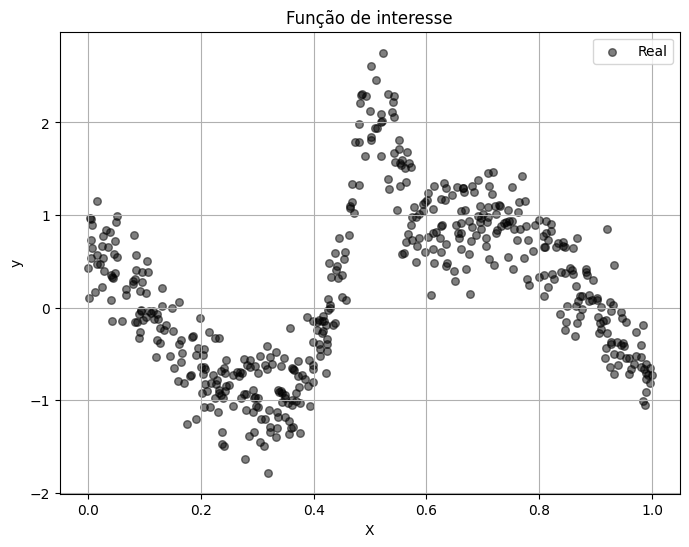

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='black', label='Real', alpha=0.5, s=30)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Função de interesse')
plt.grid()
plt.legend()
plt.show()

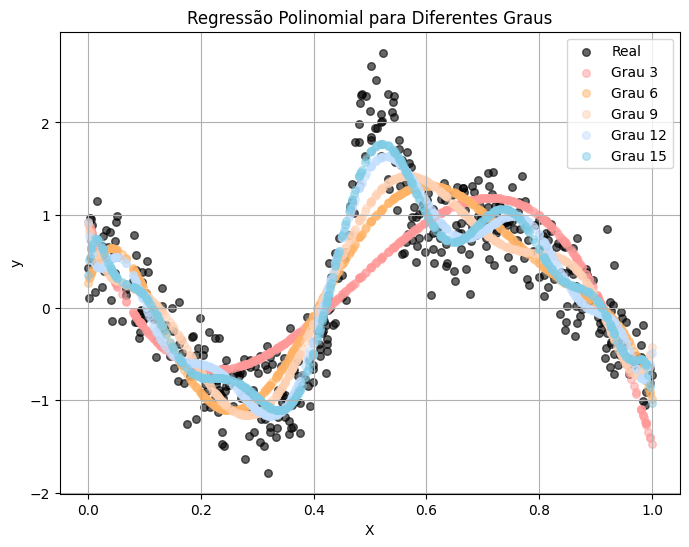

In [48]:
# Graus dos polinômios a serem ajustados
graus = [3, 6, 9, 12, 15]

# Cores para os diferentes graus
cores = ['#FF9999', '#FFB366', '#FFD1B3', '#C2DFFF', '#80CCE6']    # Cores pastel

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='black', label='Real', alpha=0.6, s=30)
# Ajuste do modelo para cada grau e plotagem dos resultados
for grau, cor in zip(graus, cores):
    # Ajuste do modelo
    model = np.poly1d(np.polyfit(X.ravel(), y, grau))
    
    # Previsão do modelo
    y_pred = model(X)
    
    # Plotagem dos resultados
    plt.scatter(X, y_pred, color=cor, label=f'Grau {grau}', alpha=0.5, s=30)

# Plotagem dos dados reais


# Configurações adicionais
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regressão Polinomial para Diferentes Graus')
plt.grid()
plt.legend()
plt.show()

In [49]:
print("X:", X[:10])
print("y:", y[:10])

X: [0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646
 0.9807642  0.68482974 0.4809319  0.39211752]
y: [ 0.85281007 -1.38293672 -0.81972219  1.71135749  0.45763217 -0.33661761
 -0.63688674  1.25110564  1.78514907 -0.56055872]


# GAM com regressão linear

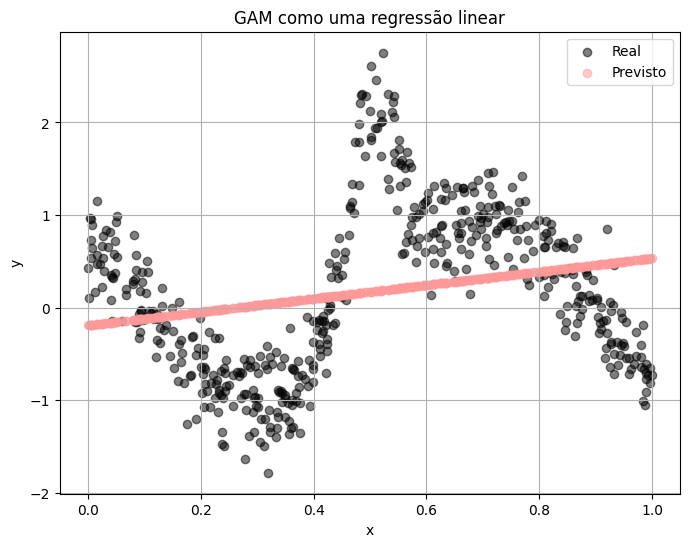

In [50]:
from pygam import GAM
from pygam import l
import matplotlib.pyplot as plt

modelo = GAM(l(0))

modelo.fit(X, y)

y_pred = modelo.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='black', alpha=0.5, label='Real')
plt.scatter(d["x"].values, y_pred, color='#FF9999', alpha=0.5, label='Previsto')
plt.title("GAM como uma regressão linear")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [51]:
modelo.coef_

array([ 0.72586626, -0.19126074])

# GAM com step function

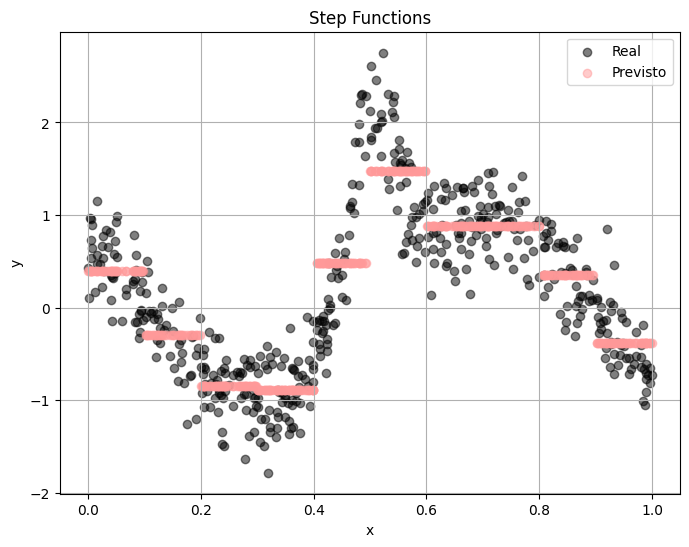

In [52]:
modelo = GAM(f(0))


intervalos = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
rotulos = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Categorizando x
X_rotulo = pd.cut(X, bins=intervalos, labels=rotulos, right=False)

modelo.fit(X_rotulo, y)

y_pred = modelo.predict(X_rotulo)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='black', alpha=0.5, label='Real')
plt.scatter(X, y_pred, color='#FF9999', alpha=0.5, label='Previsto')
plt.title("Step Functions")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


In [53]:
modelo.coef_

array([ 0.18779828, -0.50141864, -1.04928189, -1.09552195,  0.28043331,
        1.2694356 ,  0.6782699 ,  0.67529324,  0.14236159, -0.58736944,
        0.20589059])

In [54]:
modelo.coef_ + modelo.coef_[-1]

array([ 0.39368887, -0.29552805, -0.8433913 , -0.88963136,  0.4863239 ,
        1.47532618,  0.88416049,  0.88118383,  0.34825218, -0.38147885,
        0.41178118])

# GAM com Cubic Spline

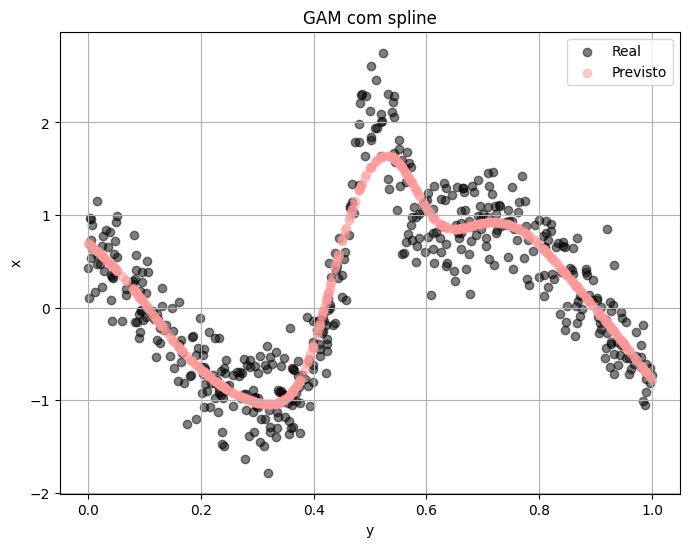

In [55]:
modelo = GAM(s(0, n_splines=16))

modelo.fit(X, y)

y_pred = modelo.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='black', alpha=0.5, label='Real')
plt.scatter(X, y_pred, color='#FF9999', alpha=0.5, label='Previsto')
plt.title("GAM com spline")
plt.xlabel("y")
plt.ylabel("x")
plt.legend()
plt.grid(True)
plt.show()

In [56]:
print("Coeficientes", modelo.coef_)
print("Quantidade coeficientes", len(modelo.coef_))

Coeficientes [ 0.93360326  0.57064711  0.11847733 -0.55832888 -0.99033304 -1.22763869
 -1.16223178  1.01894213  1.8357214   0.55285941  0.80869567  0.77482436
  0.2311301  -0.31070271 -0.91746293 -1.5346375   0.14356554]
Quantidade coeficientes 17


In [57]:
modelo.terms.info

{'term_type': 'term_list',
 'verbose': False,
 'terms': [{'basis': 'ps',
   'n_splines': 16,
   'spline_order': 3,
   'by': None,
   'feature': 0,
   'lam': [0.6],
   'dtype': 'numerical',
   'penalties': ['auto'],
   'constraints': [None],
   'verbose': False,
   'term_type': 'spline_term'},
  {'verbose': False, 'term_type': 'intercept_term'}]}

### Exemplo com Link Function

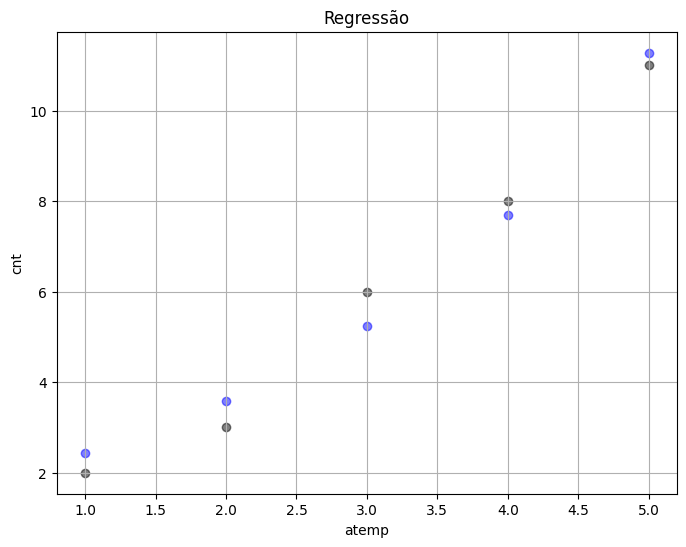

In [58]:
# Definindo o modelo com termos específicos para cada variável
modelo = GAM(l(0), link="log")
X_ = [1, 2, 3, 4, 5]
y_ = [2, 3, 6, 8, 11]

# Ajustando o modelo aos dados
modelo.fit(X_, y_)

y_prev_ = modelo.predict(X_)

plt.figure(figsize=(8, 6))
plt.scatter(X_, y_, color='black', alpha=0.5, label='Real')
plt.scatter(X_, y_prev_, color='blue', alpha=0.5, label='Previsto')
plt.title("Regressão")
plt.xlabel("atemp")
plt.ylabel("cnt")
plt.grid(True)
plt.show()

In [59]:
modelo.coef_

array([0.38279087, 0.50918268])

# Exemplo do aluguel de bicicletas

In [60]:
path = os.path.abspath(os.path.join(os.getcwd(), "data", "day.csv"))

In [61]:
def desnormalize_min_max(column, t_min, t_max):
    """
    Desnormaliza uma coluna do pandas que foi normalizada usando o método min-max.

    Parâmetros:
        column: pandas.Series, a coluna a ser desnormalizada.
        t_min: float, o valor mínimo original antes da normalização.
        t_max: float, o valor máximo original antes da normalização.

    Retorna:
        pandas.Series: a coluna desnormalizada.
    """
    desnormalized_column = column * (t_max - t_min) + t_min
    return desnormalized_column

In [62]:
df_data = pd.read_csv(path)

In [63]:
df_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [64]:
df_data["temp"] = desnormalize_min_max(df_data["temp"], -8, 39)
df_data["atemp"] = desnormalize_min_max(df_data["atemp"], -16, 50)

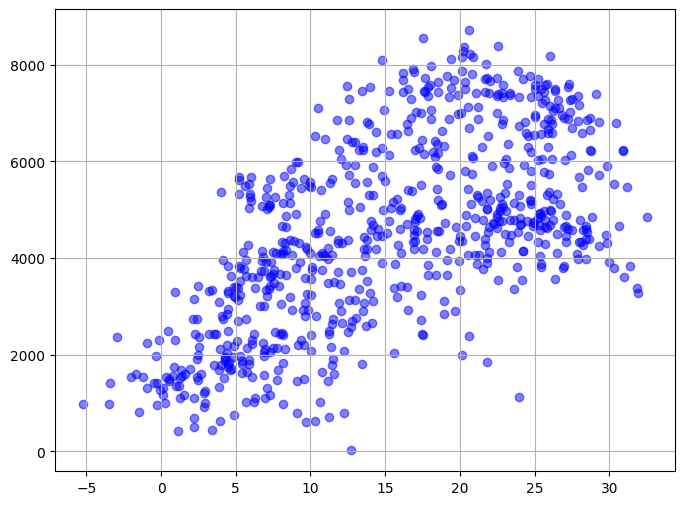

In [65]:
scatter_plot(df_data["temp"], df_data["cnt"])

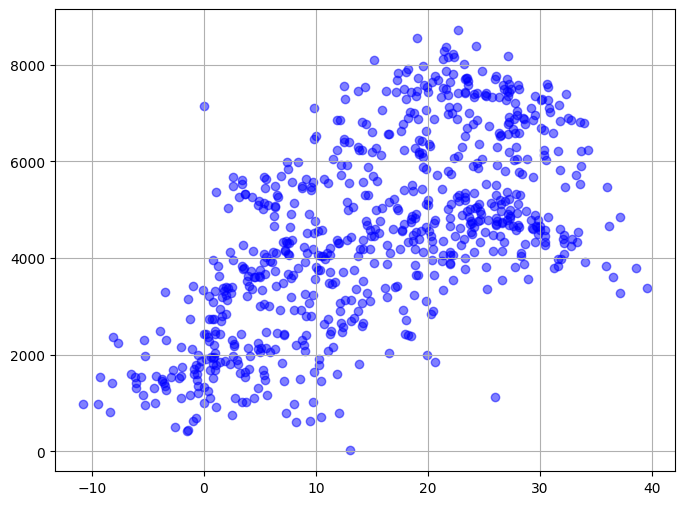

In [66]:
scatter_plot(df_data["atemp"], df_data["cnt"])

In [67]:
df_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,8.175849,7.999250,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,9.083466,7.346774,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,1.229108,-3.499270,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,1.400000,-1.999948,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,2.666979,-0.868180,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,3.945849,-1.041628,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,3.906651,0.833036,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,3.906651,-0.001600,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,4.024151,-0.707800,0.483333,0.350754,364,1432,1796


## Regressão linear com GAM

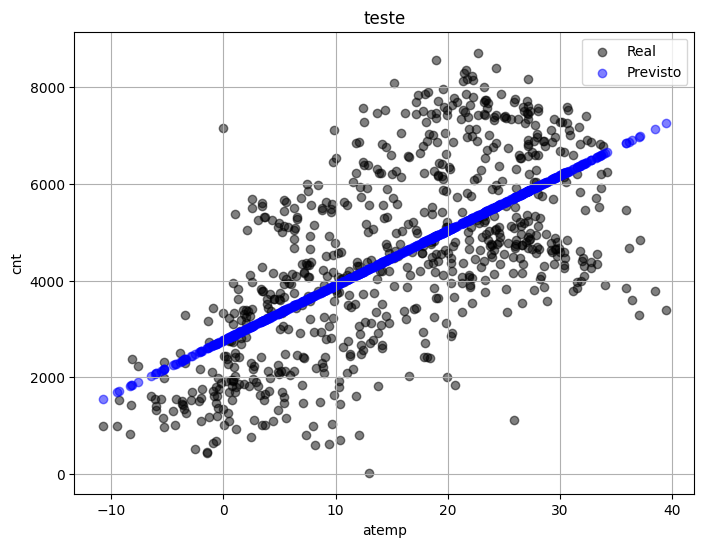

In [68]:
# Definindo o modelo com termos específicos para cada variável
modelo = GAM(l(0))

# Ajustando o modelo aos dados
modelo.fit(df_data["atemp"].values, df_data["cnt"].values)

df_data["prev"] = modelo.predict(df_data["atemp"].values)

plt.figure(figsize=(8, 6))
plt.scatter(df_data["atemp"].values, df_data["cnt"].values, color='black', alpha=0.5, label='Real')
plt.title("teste")
plt.xlabel("atemp")
plt.ylabel("cnt")

plt.scatter(df_data["atemp"].values, df_data["prev"].values, color='blue', alpha=0.5, label='Previsto')
plt.title("teste")
plt.xlabel("atemp")
plt.ylabel("cnt")
plt.legend()
plt.grid(True)
plt.show()


## Spline com GAM

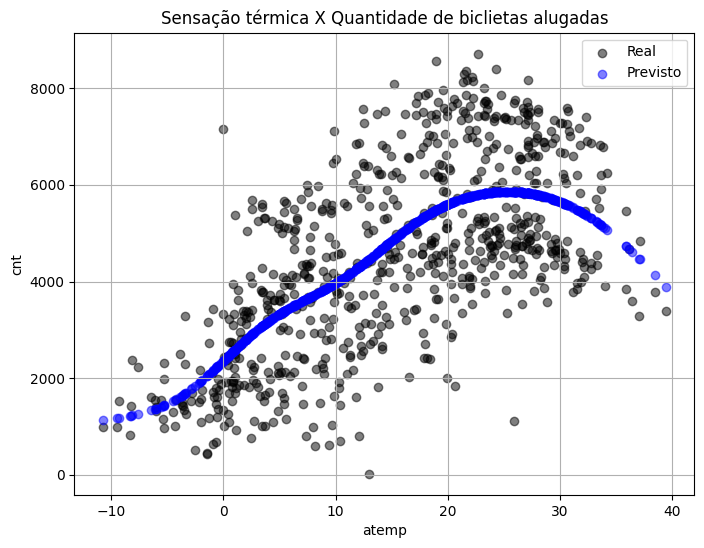

In [69]:
modelo = GAM(s(0, n_splines=10))

# Ajustando o modelo aos dados
modelo.fit(df_data["atemp"].values, df_data["cnt"].values)

df_data["prev"] = modelo.predict(df_data["atemp"].values)

plt.figure(figsize=(8, 6))
plt.scatter(df_data["atemp"].values, df_data["cnt"].values, color='black', alpha=0.5, label='Real')
plt.scatter(df_data["atemp"].values, df_data["prev"].values, color='blue', alpha=0.5, label='Previsto')
plt.title("Sensação térmica X Quantidade de biclietas alugadas")
plt.xlabel("atemp")
plt.ylabel("cnt")
plt.legend()
plt.grid(True)
plt.show()

## Modelagem com mais de uma variável no GAM

In [70]:
model_input = ["atemp", "mnth", "holiday", "weekday", "workingday", "hum"]

did not converge


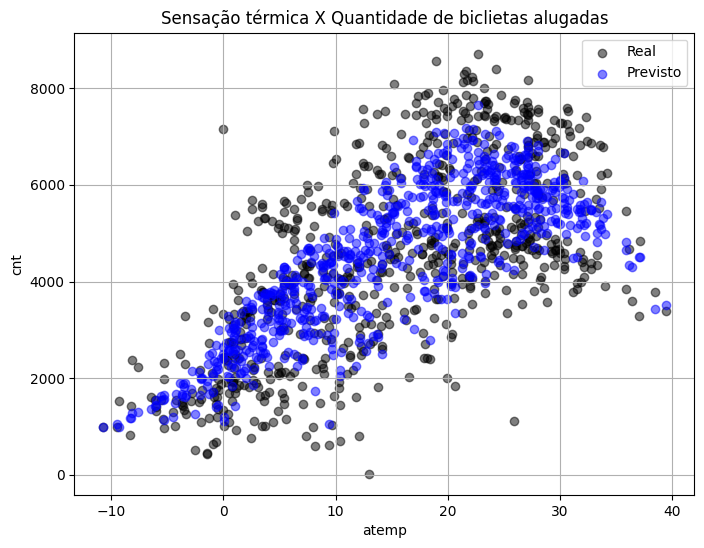

In [71]:
modelo = GAM(s(0, n_splines=5) + f(1) + f(2) + f(3) + f(4) + s(5, n_splines=5), link="log")

modelo.fit(df_data[model_input].values, df_data["cnt"].values)

df_data["prev"] = modelo.predict(df_data[model_input].values)

plt.figure(figsize=(8, 6))
plt.scatter(df_data["atemp"].values, df_data["cnt"].values, color='black', alpha=0.5, label='Real')
plt.scatter(df_data["atemp"].values, df_data["prev"].values, color='blue', alpha=0.5, label='Previsto')
plt.title("Sensação térmica X Quantidade de biclietas alugadas")
plt.xlabel("atemp")
plt.ylabel("cnt")
plt.legend()
plt.grid(True)
plt.show()

In [72]:
len(modelo.coef_)

34

In [73]:
a = len(df_data["mnth"].unique())
b = len(df_data["holiday"].unique())
c = len(df_data["weekday"].unique())
d = len(df_data["workingday"].unique())

print("Quantidade de meses", a)
print("Identificador de feriado",b)
print("Quatidade de dias da semana", c)
print("Identificador de dias úteis", d)
total = a + b + c + d + 2*5 + 1
print("")
print("Total de coeficientes", total)

Quantidade de meses 12
Identificador de feriado 2
Quatidade de dias da semana 7
Identificador de dias úteis 2

Total de coeficientes 34


In [74]:
modelo.terms._get_terms()

[s(0), f(1), f(2), f(3), f(4), s(5), intercept]

In [75]:
s0 = modelo.terms._get_terms()[0]

In [76]:
s0.get_params()

{'basis': 'ps',
 'n_splines': 5,
 'spline_order': 3,
 'by': None,
 'feature': 0,
 'lam': [0.6],
 'dtype': 'numerical',
 'penalties': ['auto'],
 'constraints': [None],
 'verbose': False}

In [77]:
s0.info

{'basis': 'ps',
 'n_splines': 5,
 'spline_order': 3,
 'by': None,
 'feature': 0,
 'lam': [0.6],
 'dtype': 'numerical',
 'penalties': ['auto'],
 'constraints': [None],
 'verbose': False,
 'term_type': 'spline_term'}

## Calculando previsão manualmente (análise por função base)

In [78]:
X_new_splines = modelo._modelmat(df_data[["atemp", "mnth", "holiday", "weekday", "workingday", "hum"]].values)
X_new_dense = X_new_splines.toarray()  
num_splines = X_new_dense.shape[1]
df_new_splines = pd.DataFrame(X_new_dense, columns=[f'B{i}' for i in range(num_splines)])
df_new_splines

,B0,B1,B2,B3,B4,B5,B6,B7,B8,B9,...,B24,B25,B26,B27,B28,B29,B30,B31,B32,B33
0,0.002698,0.317051,0.610769,0.069482,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.000000e+00,0.006711,0.376654,0.569317,0.047317,1.0
1,0.003616,0.334174,0.599720,0.062489,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.000000e+00,0.030616,0.520621,0.435369,0.013394,1.0
2,0.059738,0.594915,0.341297,0.004051,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.703125e-04,0.221590,0.657032,0.121207,0.000000,1.0
3,0.045919,0.565966,0.381012,0.007103,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.000000e+00,0.080850,0.625677,0.291834,0.001639,1.0
4,0.037033,0.541836,0.410912,0.010218,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.736304e-04,0.221971,0.656911,0.120944,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.038313,0.545649,0.406347,0.009691,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.000000e+00,0.047317,0.569317,0.376654,0.006711,1.0
727,0.025956,0.502537,0.455074,0.016434,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.000000e+00,0.081127,0.625998,0.291256,0.001619,1.0
728,0.031063,0.522227,0.433571,0.013139,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.000000e+00,0.015349,0.448378,0.508784,0.027490,1.0
729,0.035875,0.538277,0.415126,0.010722,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,3.598149e-08,0.169684,0.666631,0.163685,0.000000,1.0


<Axes: >

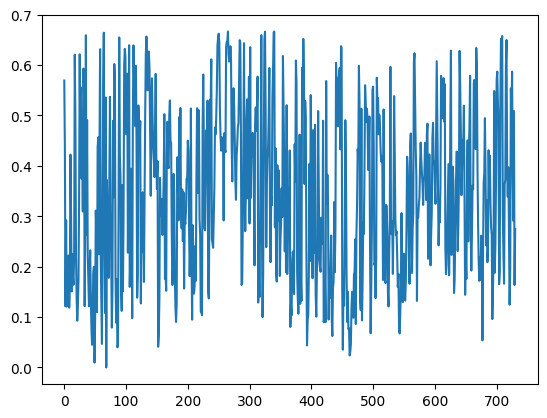

In [79]:
df_new_splines["B31"].plot()

In [80]:
coefs = modelo.coef_
new_predictions = np.dot(df_new_splines, coefs)
new_predictions = modelo.link.mu(new_predictions, modelo.distribution)
df_data['predicted_target'] = new_predictions

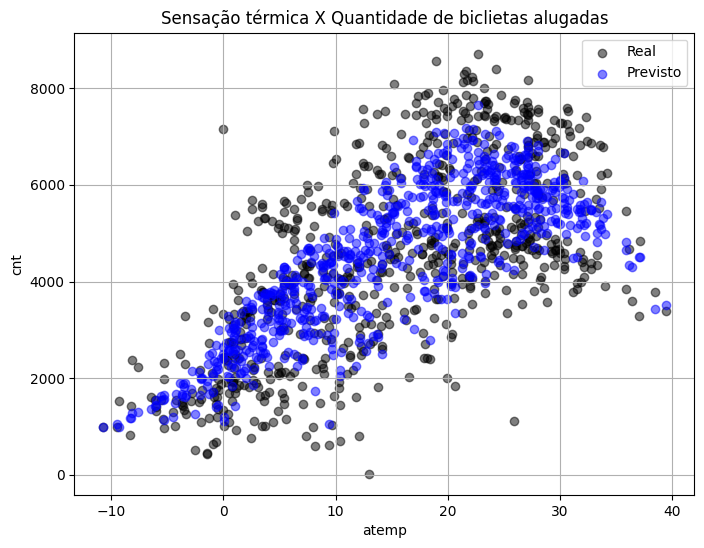

In [81]:
plt.figure(figsize=(8, 6))
plt.scatter(df_data["atemp"].values, df_data["cnt"].values, color='black', alpha=0.5, label='Real')
plt.scatter(df_data["atemp"].values, df_data["predicted_target"].values, color='blue', alpha=0.5, label='Previsto')
plt.title("Sensação térmica X Quantidade de biclietas alugadas")
plt.xlabel("atemp")
plt.ylabel("cnt")
plt.legend()
plt.grid(True)
plt.show()